**keras** 是一款使用纯 `python` 编写的神经网络 API，使用 keras 能够快速实现你的深度学习方案，所以 keras 有着为快速试验而生的美称。
keras 以 `Tensorflow`、`Theano` 、`CNTK` 为后端，意思就是 keras 的底层计算都是以以上这些框架为基础的，
这使得 keras 能够专注于快速搭建起神经网络模型。

In [63]:
from sklearn.datasets import load_digits 
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np 
seed = 7
np.random.seed(seed)
data=load_digits() 
labels=data.target 
data=data.data
labels=to_categorical(labels)
data=data.reshape((-1,8,8))
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=seed)
# keras 图像 必须是 4维的输入
X_train=np.expand_dims(X_train, axis=3)
X_test=np.expand_dims(X_test, axis=3)
X_train.shape 

(1203, 8, 8, 1)

In [77]:
import numpy as np 
X=np.random.randn(12,64)
y=np.random.randn(12,1)
from keras.models import Sequential
from keras import layers
net=Sequential() 
net.add(layers.Dense(24,activation='relu'))
net.add(layers.Dropout(.5))
net.add(layers.Dense(1))
net.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
net.fit(X,y,batch_size=3,epochs=24) 

Epoch 1/24
12/12 [==============================] - 0s 15ms/step - loss: 7.6440 - accuracy: 0.0000e+00
Epoch 2/24
12/12 [==============================] - 0s 501us/step - loss: 1.9811 - accuracy: 0.0000e+00
Epoch 3/24
12/12 [==============================] - 0s 584us/step - loss: 1.9481 - accuracy: 0.0000e+00
Epoch 4/24
12/12 [==============================] - 0s 666us/step - loss: 3.4507 - accuracy: 0.0000e+00
Epoch 5/24
12/12 [==============================] - 0s 584us/step - loss: 2.7586 - accuracy: 0.0000e+00
Epoch 6/24
12/12 [==============================] - 0s 584us/step - loss: 1.8934 - accuracy: 0.0000e+00
Epoch 7/24
12/12 [==============================] - 0s 667us/step - loss: 2.8035 - accuracy: 0.0000e+00
Epoch 8/24
12/12 [==============================] - 0s 666us/step - loss: 2.2152 - accuracy: 0.0000e+00
Epoch 9/24
12/12 [==============================] - 0s 667us/step - loss: 2.7944 - accuracy: 0.0000e+00
Epoch 10/24
12/12 [==============================] - 0s 667us/ste

In [72]:
from keras.layers import Conv2D,Dense,Dropout,Activation,MaxPool2D,Flatten
from keras.models import Sequential 
def net(x_train,y_train):
    model=Sequential() 
    model.add(Conv2D(6,(5,5),strides=1,padding='valid',activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(12,(2,2),activation='relu'))
    model.add(Flatten())
    model.add(Dense(84))
    model.add(Dropout(.5))
    model.add(Dense(10,activation='softplus'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    history=model.fit(x_train,y_train,batch_size=100,epochs=100,)
    return model,history 
def eval_score(model,x,y):
    score=model.evaluate(x,y,batch_size=20)
    return score 

X=X_train
y=y_train
model,history=net(X,y)
# print(history)
print(eval_score(model,X_test,y_test))           

Epoch 1/100
1203/1203 [==============================] - 0s 255us/step - loss: 2.5029 - accuracy: 0.0998
Epoch 2/100
1203/1203 [==============================] - 0s 36us/step - loss: 2.2486 - accuracy: 0.1380
Epoch 3/100
1203/1203 [==============================] - 0s 34us/step - loss: 2.1649 - accuracy: 0.2062
Epoch 4/100
1203/1203 [==============================] - 0s 37us/step - loss: 2.0579 - accuracy: 0.2668
Epoch 5/100
1203/1203 [==============================] - 0s 35us/step - loss: 1.9479 - accuracy: 0.3317
Epoch 6/100
1203/1203 [==============================] - 0s 33us/step - loss: 1.8263 - accuracy: 0.3907
Epoch 7/100
1203/1203 [==============================] - 0s 37us/step - loss: 1.7126 - accuracy: 0.4156
Epoch 8/100
1203/1203 [==============================] - 0s 36us/step - loss: 1.5723 - accuracy: 0.4855
Epoch 9/100
1203/1203 [==============================] - 0s 34us/step - loss: 1.4820 - accuracy: 0.5204
Epoch 10/100
1203/1203 [==============================] - 0s 39

1203/1203 [==============================] - 0s 33us/step - loss: 0.1165 - accuracy: 0.9626
Epoch 80/100
1203/1203 [==============================] - 0s 36us/step - loss: 0.1215 - accuracy: 0.9667
Epoch 81/100
1203/1203 [==============================] - 0s 35us/step - loss: 0.1215 - accuracy: 0.9626
Epoch 82/100
1203/1203 [==============================] - 0s 34us/step - loss: 0.1396 - accuracy: 0.9576
Epoch 83/100
1203/1203 [==============================] - 0s 34us/step - loss: 0.1580 - accuracy: 0.9485
Epoch 84/100
1203/1203 [==============================] - 0s 32us/step - loss: 0.1257 - accuracy: 0.9626
Epoch 85/100
1203/1203 [==============================] - 0s 33us/step - loss: 0.1152 - accuracy: 0.9659
Epoch 86/100
1203/1203 [==============================] - 0s 37us/step - loss: 0.1209 - accuracy: 0.9709
Epoch 87/100
1203/1203 [==============================] - 0s 35us/step - loss: 0.1206 - accuracy: 0.9643
Epoch 88/100
1203/1203 [==============================] - 0s 33us/st

In [73]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 4, 4, 6)           156       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 2, 2, 6)           0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 1, 1, 12)          300       
_________________________________________________________________
flatten_15 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 84)                1092      
_________________________________________________________________
dropout_24 (Dropout)         (None, 84)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 10)              

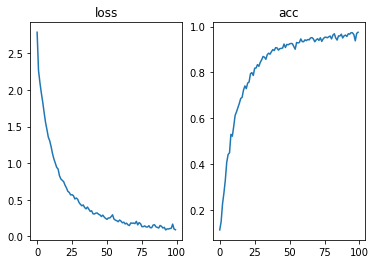

In [71]:
info=history.history
loss=info['loss']
acc=info['accuracy']
from matplotlib import pyplot as plt 
plt.subplot(1,2,1)
plt.plot(loss)
plt.title('loss')
plt.subplot(1,2,2)
plt.plot(acc)
plt.title('acc')
plt.show()               